## Example of Forecasting a Time Series with Trend and Cyclic Features using a Tree-Based Model

By Brett Efaw, February 2022

Generate a synthetic data set, with trend, cyclic components and events, as well as noise.

The cyclic components are based on cyclic date/time components, such as hour of day or day or week. This should be something a tree-based algo can model well. In this data set, day of the week, day of the month and day of the year are used as cyclic components.

The trend is not something the tree-based algo can model well, assuming it extends outside the range of the training data. In real-world examples, this may or may not be an issue, depending on the data set.

In [124]:
import numpy as np
import pandas as pd
df = pd.DataFrame()
df["dt"] = pd.date_range("2019-01-01", "2021-12-31", freq = "D")
df["noise"] = np.random.normal(0, 0.1, len(df))
df["trend"] = np.linspace(-1.0, 1.0, len(df))
df["event"] = np.random.choice([-0.5, 0.0, 0.5], size = len(df), p = [0.01, 0.98, 0.01])
df["dw"] = df["dt"].dt.dayofweek+1
df["dm"] = df["dt"].dt.day
df["dy"] = df["dt"].dt.dayofyear
df["dn"] = df.index + 1
df["sdw"] = np.sin(2.0 * np.pi * (df["dw"]-1)/7)
df["sdm"] = np.sin(2.0 * np.pi * (df["dm"]-1)/31)
df["sdy"] = np.sin(2.0 * np.pi * (df["dy"]-1)/366)
df["y"] = df["trend"] + (0.333*df["sdw"]) + (0.333*df["sdm"]) + (0.333*df["sdy"]) + df["event"] + df["noise"]
df.head(20)

dt     noise     trend  event  dw  dm  dy  dn       sdw       sdm  \
0  2019-01-01  0.045216 -1.000000    0.0   2   1   1   1  0.781831  0.000000   
1  2019-01-02 -0.141499 -0.998174    0.0   3   2   2   2  0.974928  0.201299   
2  2019-01-03  0.153002 -0.996347    0.0   4   3   3   3  0.433884  0.394356   
3  2019-01-04  0.048404 -0.994521   -0.5   5   4   4   4 -0.433884  0.571268   
4  2019-01-05  0.048814 -0.992694    0.0   6   5   5   5 -0.974928  0.724793   
5  2019-01-06 -0.135494 -0.990868    0.0   7   6   6   6 -0.781831  0.848644   
6  2019-01-07  0.021766 -0.989041    0.0   1   7   7   7  0.000000  0.937752   
7  2019-01-08  0.196824 -0.987215    0.0   2   8   8   8  0.781831  0.988468   
8  2019-01-09  0.075952 -0.985388    0.0   3   9   9   9  0.974928  0.998717   
9  2019-01-10  0.057128 -0.983562    0.0   4  10  10  10  0.433884  0.968077   
10 2019-01-11 -0.023357 -0.981735    0.0   5  11  11  11 -0.433884  0.897805   
11 2019-01-12 -0.014144 -0.979909    0.0   6  12  12  12 -0.974928  0.790776   
12 2019-01-13  0.016794 -0.978082    0.0   7  13  13  13 -0.781831  0.651372   
13 2019-01-14 -0.149568 -0.976256    0.0   1  14  14  14  0.000000  0.485302   
14 2019-01-15  0.071008 -0.974429    0.0   2  15  15  15  0.781831  0.299363   
15 2019-01-16  0.120330 -0.972603    0.0   3  16  16  16  0.974928  0.101168   
16 2019-01-17  0.175319 -0.970776    0.0   4  17  17  17  0.433884 -0.101168   
17 2019-01-18  0.066299 -0.968950    0.0   5  18  18  18 -0.433884 -0.299363   
18 2019-01-19  0.094861 -0.967123    0.0   6  19  19  19 -0.974928 -0.485302   
19 2019-01-20 -0.036143 -0.965297    0.0   7  20  20  20 -0.781831 -0.651372   

         sdy         y  
0   0.000000 -0.694434  
1   0.017166 -0.742272  
2   0.034328 -0.556110  
3   0.051479 -1.383225  
4   0.068615 -1.004327  
5   0.085731 -1.075564  
6   0.102821 -0.620764  
7   0.119881 -0.160960  
8   0.136906 -0.206622  
9   0.153891 -0.408336  
10  0.170830 -0.793721  
11  0.187719 -0.992865  
12  0.204552 -0.936615  
13  0.221325 -0.890516  
14  0.238033 -0.464119  
15  0.254671 -0.409127  
16  0.271234 -0.594342  
17  0.287717 -1.051012  
18  0.304115 -1.257248  
19  0.320423 -1.371996

## Plot the Time Series Components

Plot noise, trend and events. These are offset from 0 in the graph so they are easier to see.

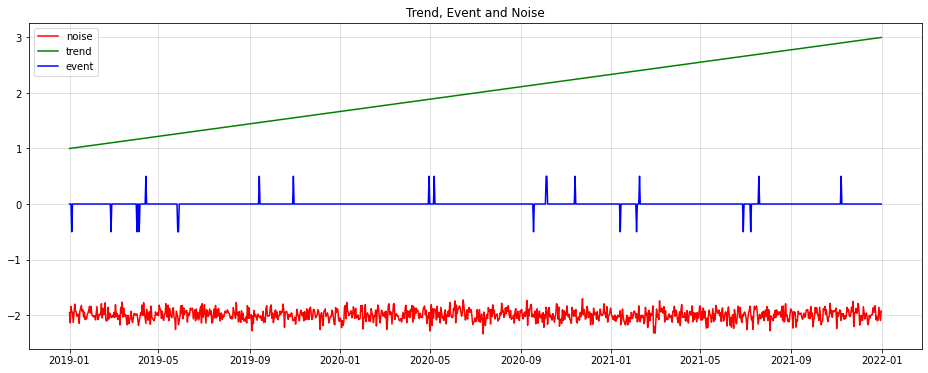

In [125]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols = 1, figsize = (16,6))
plt.plot(df["dt"], df["noise"]-2, label = "noise", c = "red")
plt.plot(df["dt"], df["trend"]+2, label = "trend", c = "green")
plt.plot(df["dt"], df["event"]+0, label = "event", c = "blue")
plt.grid(visible = True, color = "grey", alpha = 0.3)
plt.title("Trend, Event and Noise")
plt.legend()
plt.show() ;

Plot the cyclic features: high periodicity (day of the week), medium periodicity (day of the month), low periodicity (day of the year). 

These are offset from 0 so they are easier to see in the graph.

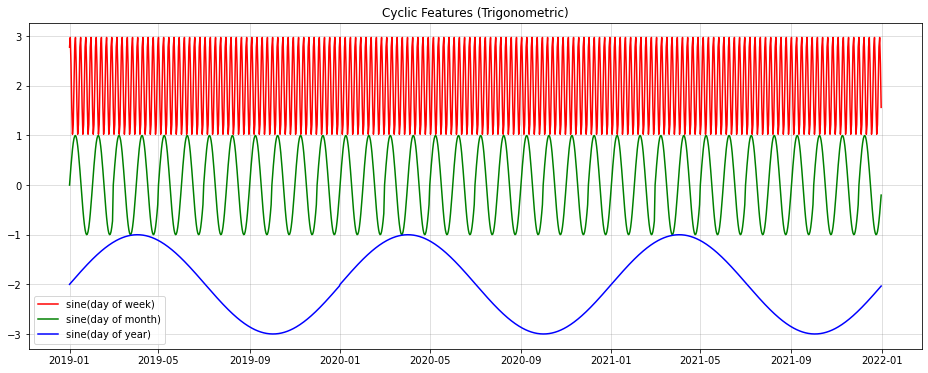

In [126]:
fig, ax = plt.subplots(ncols = 1, figsize = (16,6))
plt.plot(df["dt"], df["sdw"] + 2, label = "sine(day of week)", c = "red")
plt.plot(df["dt"], df["sdm"] + 0, label = "sine(day of month)", c = "green")
plt.plot(df["dt"], df["sdy"] - 2, label = "sine(day of year)", c = "blue")
plt.grid(visible = True, color = "grey", alpha = 0.3)
plt.title("Cyclic Features (Trigonometric)")
plt.legend()
plt.show() ;

Plot the date components (day of week, day of month, day of year). 

These will be used as features in the tree-based ensemble model (the trigonometric representations of these cyclic features could also be used if feature scaling is required).

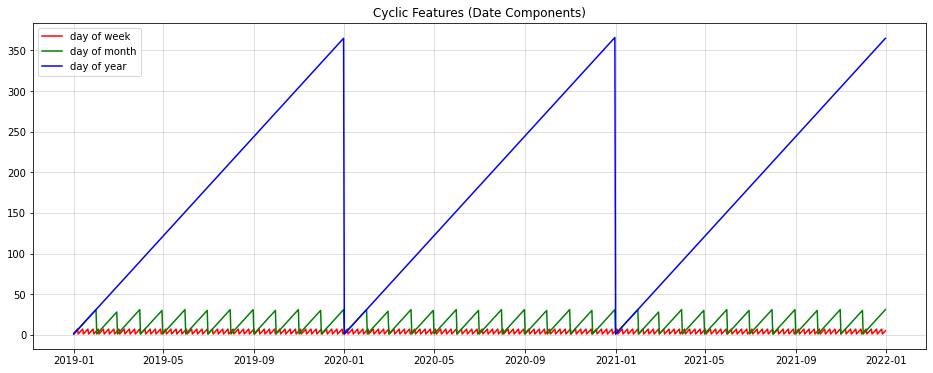

In [127]:
fig, ax = plt.subplots(ncols = 1, figsize = (16,6))
plt.plot(df["dt"], df["dw"], label = "day of week", c = "red")
plt.plot(df["dt"], df["dm"], label = "day of month", c = "green")
plt.plot(df["dt"], df["dy"], label = "day of year", c = "blue")
plt.grid(visible = True, color = "grey", alpha = 0.3)
plt.title("Cyclic Features (Date Components)")
plt.legend()
plt.show() ;

Plot the target variable (combination of trend, events, noise and cyclic features).

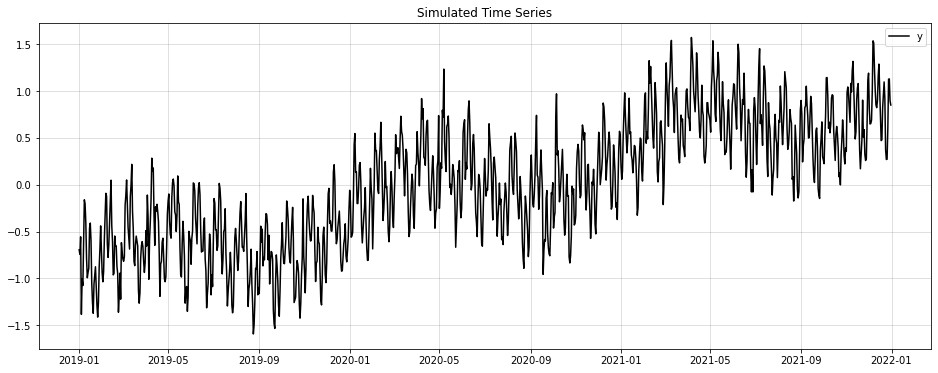

In [128]:
fig, ax = plt.subplots(ncols = 1, figsize = (16,6))
plt.plot(df["dt"], df["y"], label = "y", c = "black")
plt.grid(visible = True, color = "grey", alpha = 0.3)
plt.title("Simulated Time Series")
plt.legend()
plt.show() ;

## Time Series Split

Create time series splits. These are used to evaluate forecast accuracy.

- n_splits: the number of time series splits (similar to k in k-fold cross-validation)
- test_size: the number of observations in the test split (i.e. forecast horizon)
- max_train_size: the maximum number of observations in the train split
- gap: how much gap (measured in number of time steps) between splits

In [129]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 10
test_size = 30
ts_split = TimeSeriesSplit(
    n_splits = n_splits,  
    max_train_size = 365*2,
    test_size = test_size, 
    gap = 0
)
all_splits = list(ts_split.split(df))

Fit a tree-based ensemble model without detrending first. This is a simple linear trend without any noise. The purpose of this is to show how the tree-based ensemble can't make predictions outside the range of values it was trained on.

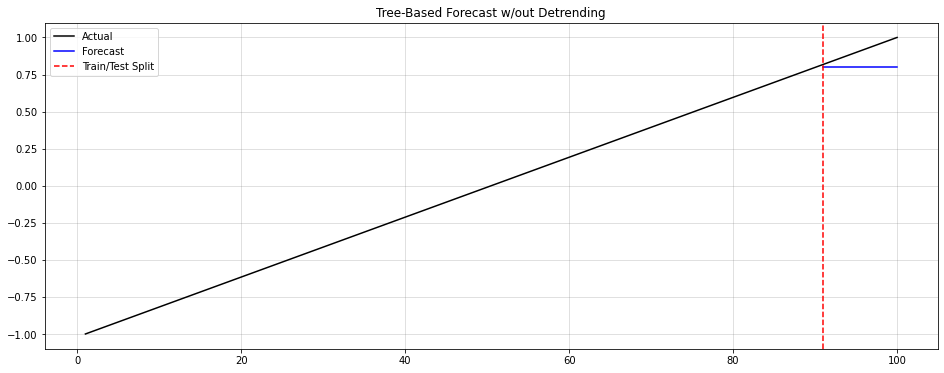

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
tree_mod = GradientBoostingRegressor()
df_tree = pd.DataFrame({ 
    "x": np.arange(0,100)+1, 
    "y": np.linspace(-1, 1, 100) 
})
tree_fit = tree_mod.fit(X = np.ravel(df_tree.head(90)["x"]).reshape(-1,1), y = np.ravel(df_tree.head(90)["y"]))
y_fore = tree_fit.predict(X = np.ravel(df_tree.tail(10)["x"]).reshape(-1,1))
fig, ax = plt.subplots(ncols = 1, figsize = (16,6))
plt.plot(df_tree["x"], df_tree["y"], label = "Actual", c = "black")
plt.plot(df_tree.tail(10)["x"], y_fore, label = "Forecast", c = "blue")
plt.axvline(x = 91, linestyle = "--", label = "Train/Test Split", color = "red")
plt.grid(visible = True, color = "grey", alpha = 0.3)
plt.title("Tree-Based Forecast w/out Detrending")
plt.legend()
plt.show() ;

## Trend: Fit and Forecast

Fit a trend to the training data, then forecast (predict) the trend for the test data.

**Note:** 

The method used for fitting and forecasting the trend could vary based on the characteristics of the time series. 

In this example, we use Linear Regression and that works well since the time series has a linear trend built into it. 

However, not all time series have a known structure for the trend, so the choice for what method to use to fit the trend could vary.

Some other example approaches:
- statsmodels.tsa.seasonal - season_decompose() 
- pygam - LinearGAM() to model the trend as a low-order spline
- scipy.signal for signal filtering
- statsmodels.nonparametric.kernel_regression
- aggregate the time series to a lower-order periodicity (i.e. monthly), then use statsmodels.tsa.arima

In [135]:
from sklearn.linear_model import LinearRegression
lr_mod = LinearRegression()
trend_results = pd.DataFrame()
# Loop thru time series splits
for split in np.arange(0, len(all_splits)):
    train_index, test_index = all_splits[split]
    x_train = np.ravel(df.loc[train_index, ["dn"]])
    x_test = np.ravel(df.loc[test_index, ["dn"]])
    y_train = np.ravel(df.loc[train_index, ["y"]])
    y_test = np.ravel(df.loc[test_index, ["y"]])
    lr_fit = lr_mod.fit(X = x_train.reshape(-1,1), y = y_train)
    df_1 = pd.DataFrame({
        "split": split,
        "dt": np.ravel(df.loc[train_index, ["dt"]]),
        "trend": lr_fit.predict(X = x_train.reshape(-1,1)),
        "type": "fitted"
    })
    df_2 = pd.DataFrame({
        "split": split,
        "dt": np.ravel(df.loc[test_index, ["dt"]]),
        "trend": lr_fit.predict(X = x_test.reshape(-1,1)),
        "type": "forecast"
    })
    df_3 = pd.concat([df_1, df_2], axis = 0)
    trend_results = pd.concat([trend_results, df_3], axis = 0)
trend_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7600 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   split   7600 non-null   int32         
 1   dt      7600 non-null   datetime64[ns]
 2   trend   7600 non-null   float64       
 3   type    7600 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 267.2+ KB


## Plot the Fitted and Forecasted Trend

Plot the fitted and forecast trend for each time series split.

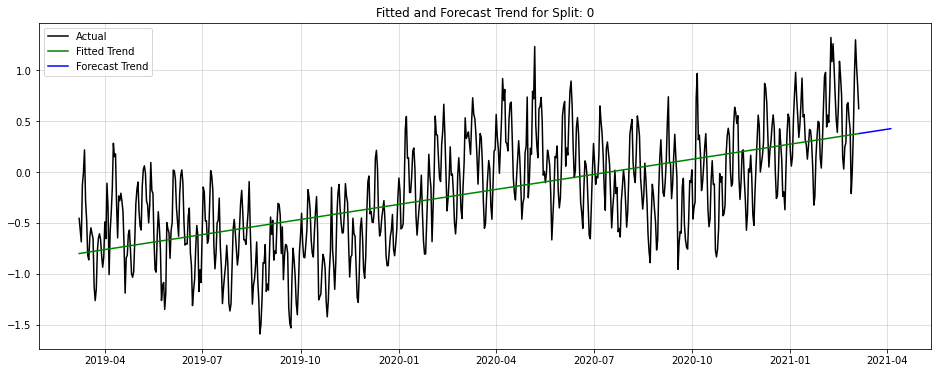

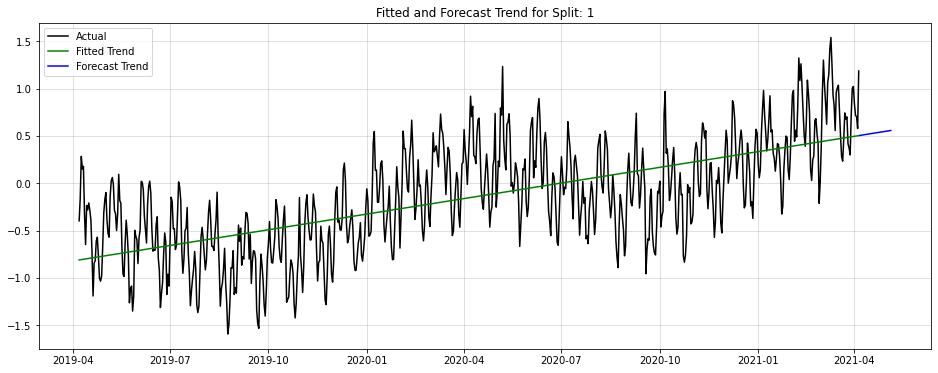

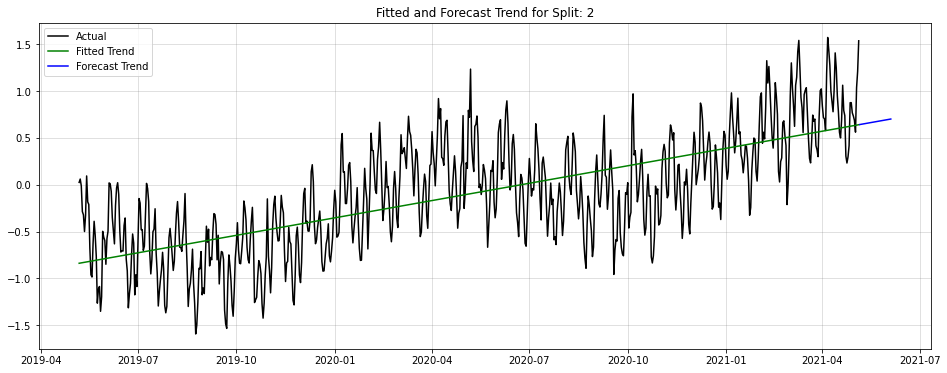

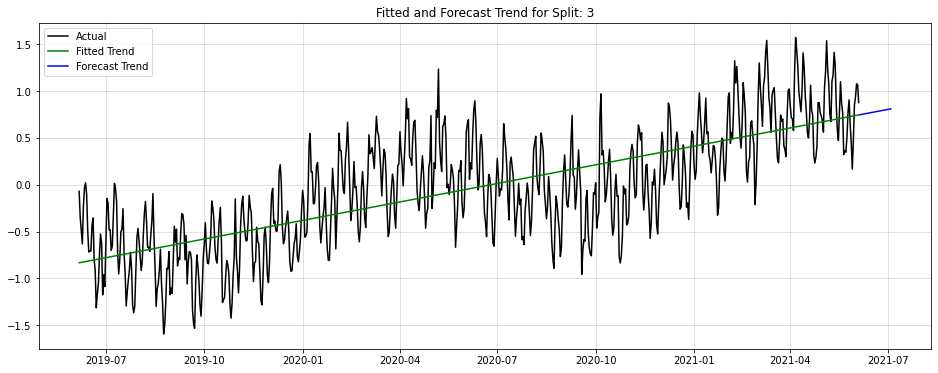

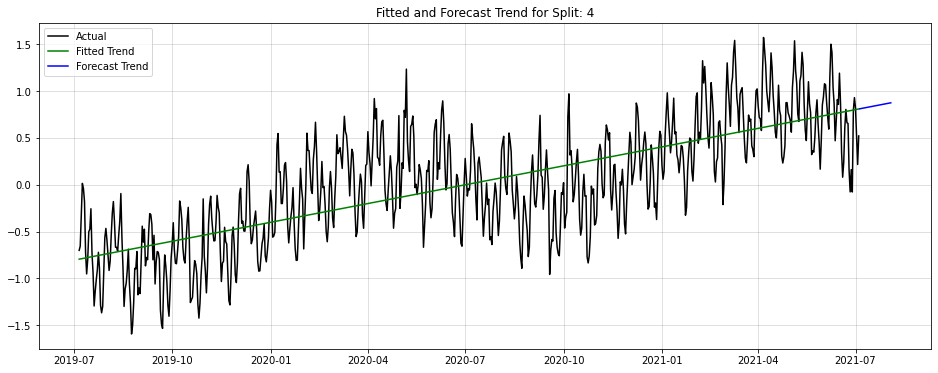

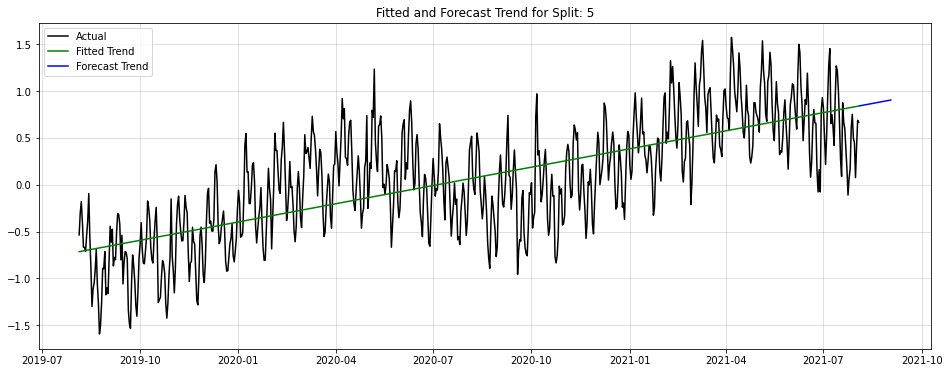

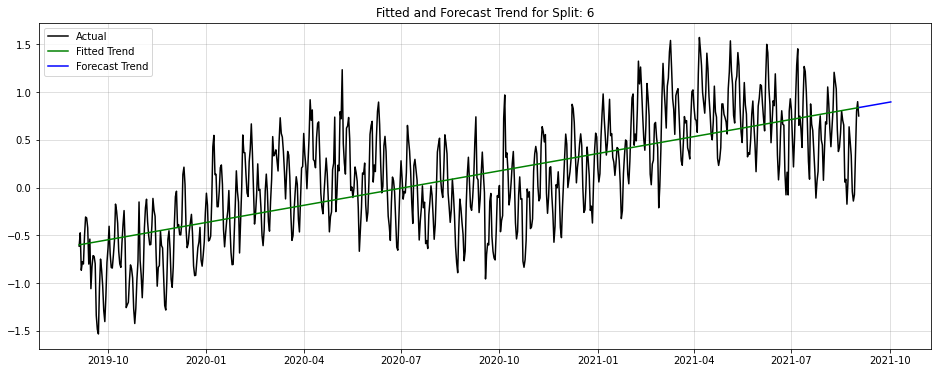

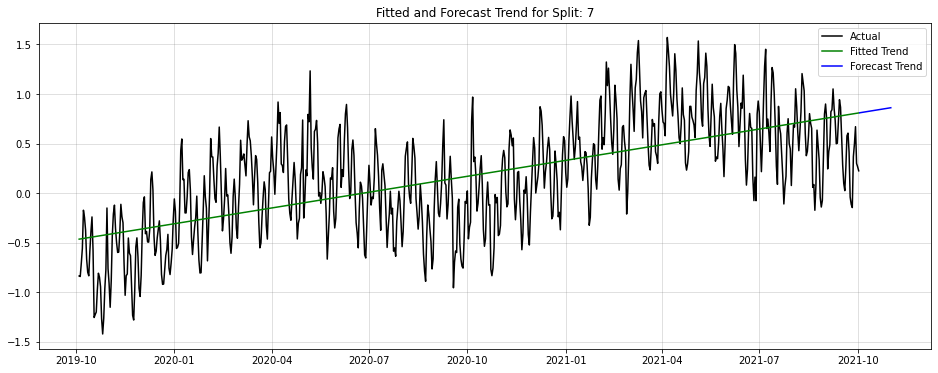

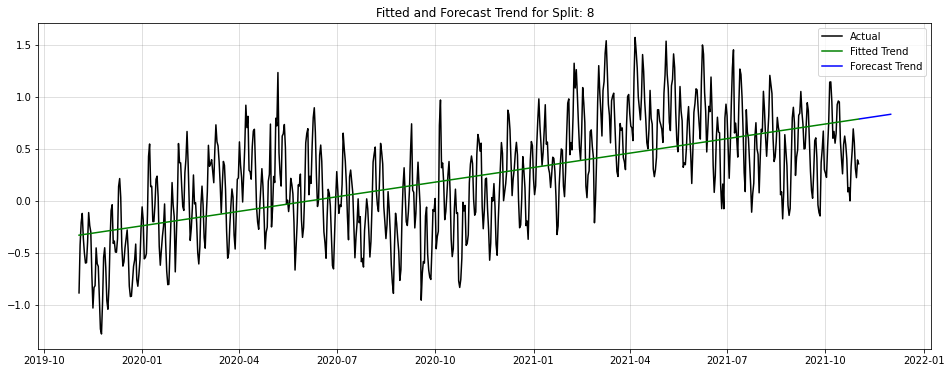

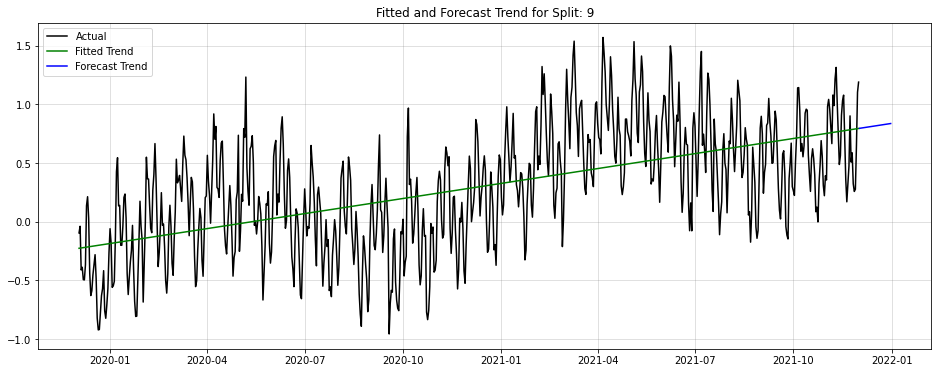

In [136]:
for split in np.arange(0, n_splits):
    train_index, test_index = all_splits[split]
    x_train = np.ravel(df.loc[train_index, ["dt"]])
    x_test = np.ravel(df.loc[test_index, ["dt"]])
    y_train = np.ravel(df.loc[train_index, ["y"]])
    y_trend = np.ravel(trend_results.query("split==@split and type=='fitted'")["trend"])
    y_fore = np.ravel(trend_results.query("split==@split and type=='forecast'")["trend"])
    fig, ax = plt.subplots(ncols = 1, figsize = (16,6))
    plt.plot(x_train, y_train, label = "Actual", c = "black")
    plt.plot(x_train, y_trend, label = "Fitted Trend", c = "green")
    plt.plot(x_test, y_fore, label = "Forecast Trend", c = "blue")
    plt.grid(visible = True, color = "grey", alpha = 0.3)
    plt.title("Fitted and Forecast Trend for Split: " + split.astype("str"))
    plt.legend()
    plt.show() ;

## De-Trend the Time Series

De-trend the time series so that we can train the tree-based model on the data without needing to worry if the forecast horizon will extrapolate outside the range of values seen in the training data.

In [137]:
detrend_results = pd.DataFrame()
for split in np.arange(0, len(all_splits)):
    train_index, test_index = all_splits[split]
    x_train = np.ravel(df.loc[train_index, ["dt"]])
    x_test = np.ravel(df.loc[test_index, ["dt"]])
    y_train = np.ravel(df.loc[train_index, ["y"]])
    y_trend = np.ravel(trend_results.query("split==@split and type=='fitted'")["trend"])
    df_calc = pd.DataFrame({
        "split": split,
        "dt": x_train,
        "detrend": y_train - y_trend
    })
    detrend_results = pd.concat([detrend_results, df_calc])
detrend_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7300 entries, 0 to 729
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   split    7300 non-null   int32         
 1   dt       7300 non-null   datetime64[ns]
 2   detrend  7300 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 199.6 KB


## Plot the Detrended Time Series

Note that cyclic patterns still exist.

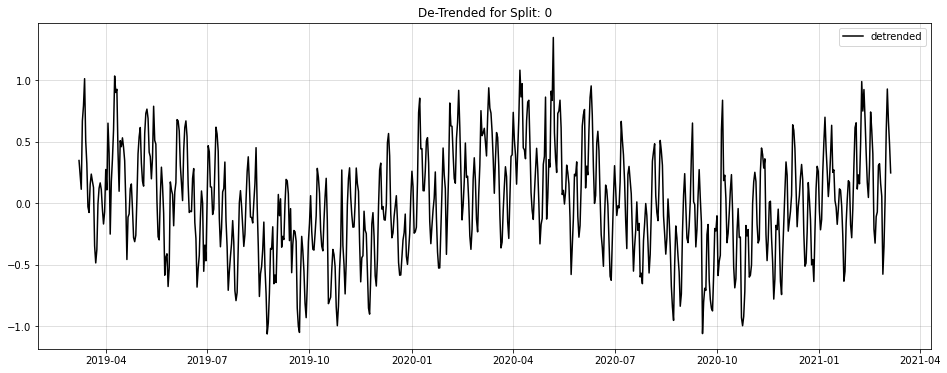

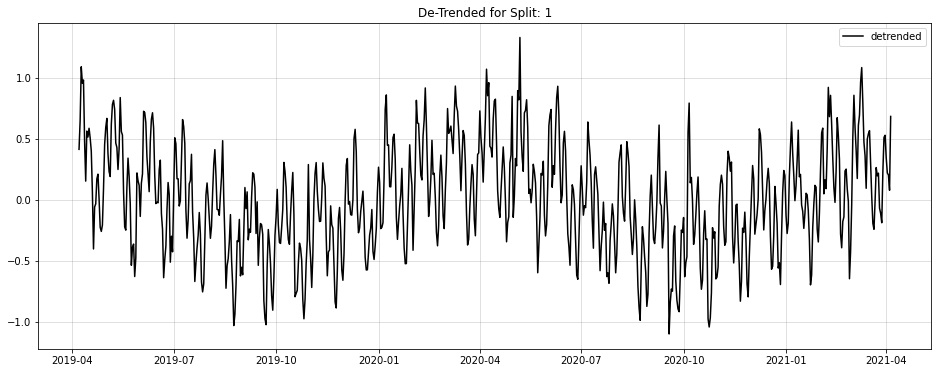

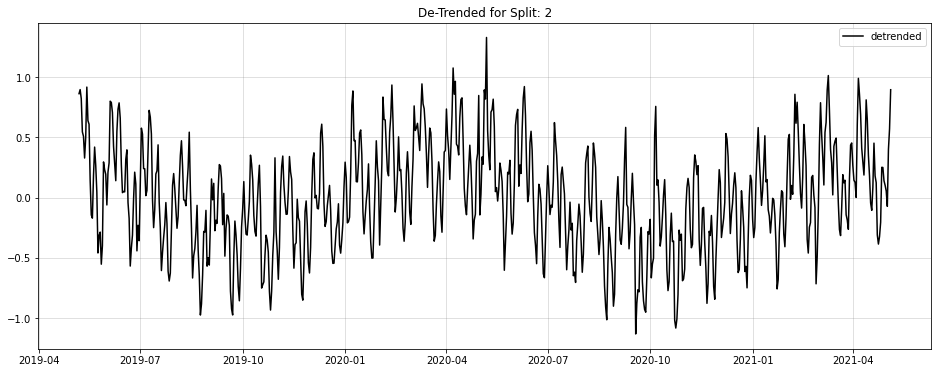

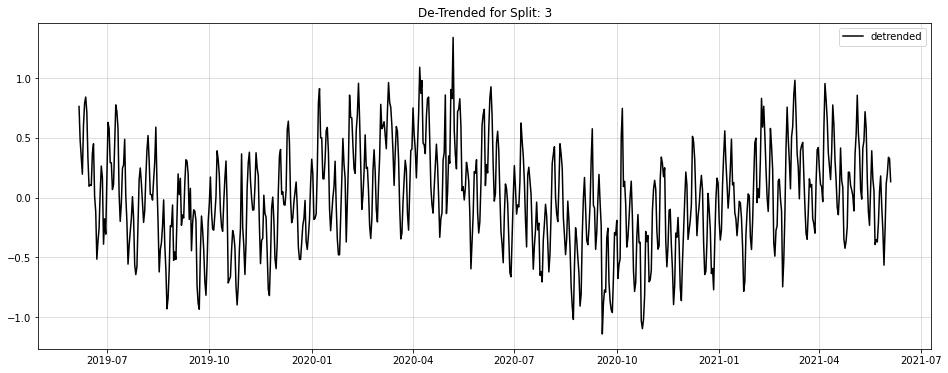

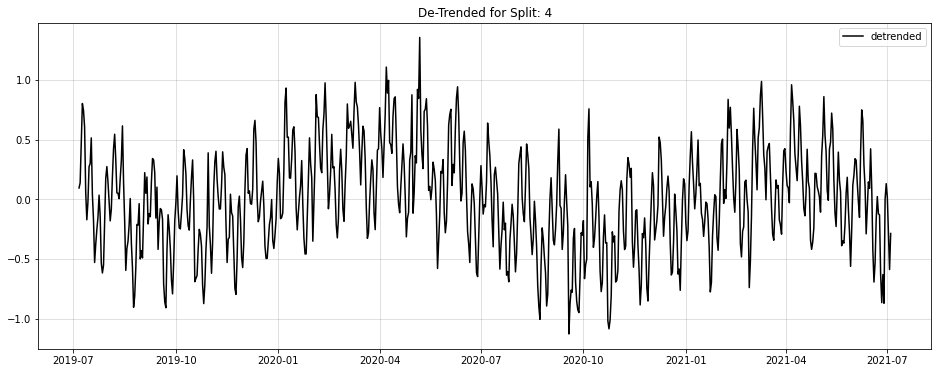

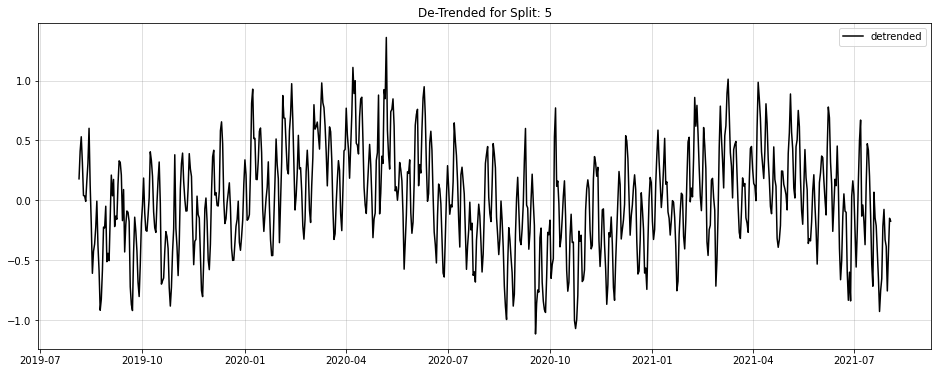

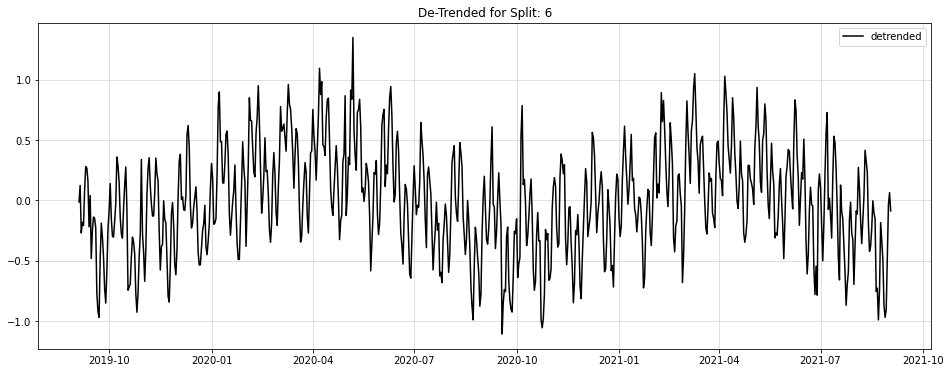

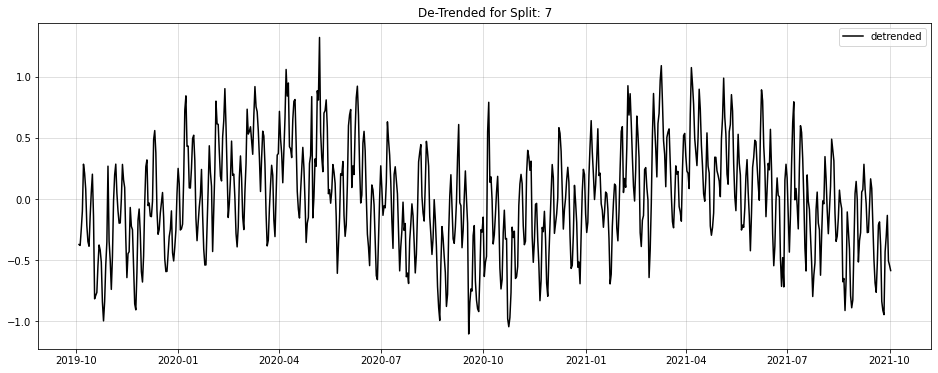

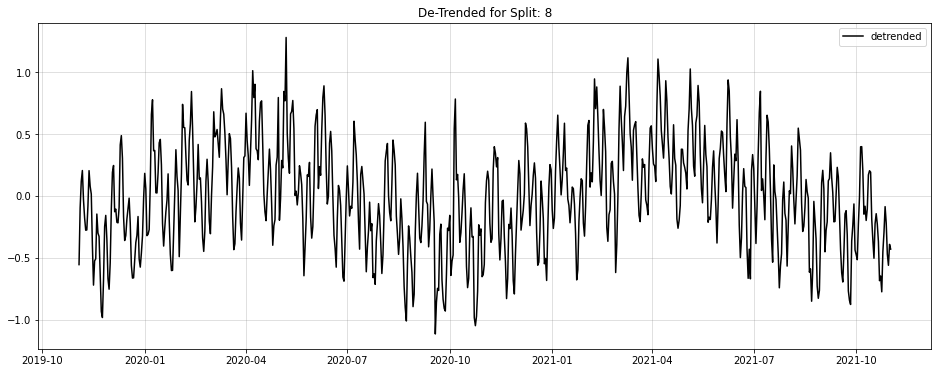

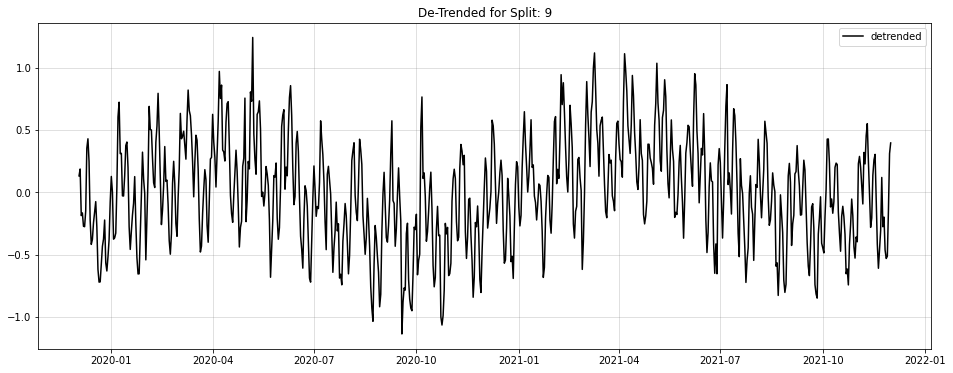

In [138]:
for split in np.arange(0, n_splits):
    train_index, test_index = all_splits[split]
    x_train = np.ravel(df.loc[train_index, ["dt"]])
    y_train = detrend_results.query("split==@split")["detrend"]
    fig, ax = plt.subplots(ncols = 1, figsize = (16,6))
    plt.plot(x_train, y_train, label = "detrended", c = "black")
    plt.grid(visible = True, color = "grey", alpha = 0.3)
    plt.title("De-Trended for Split: " + split.astype("str"))
    plt.legend()
    plt.show() ;

## Fit a Tree-Based Model

Train a tree-based model on the de-trended time series. 

Note: a benefit of using a tree-based ensemble algo is that we can include many cyclic features (i.e. date/time components) without worrying too much about spurious or correlated features.

Another note: GradientBoostingRegressor() has quantile loss, so a prediction interval can be made by fitting separate models on different quantiles. For example, a 90% prediction interval can be derived by fitting a model on the 5th (lower) and 95th (upper) percentiles.

In [144]:
tree_mod_point = GradientBoostingRegressor(loss = "quantile", alpha = 0.50)
tree_mod_lower = GradientBoostingRegressor(loss = "quantile", alpha = 0.05)
tree_mod_upper = GradientBoostingRegressor(loss = "quantile", alpha = 0.95)
tree_vars = ["dw","dm","dy","event"]

In [145]:
tree_pred = pd.DataFrame()
for split in np.arange(0, len(all_splits)):
    train_index, test_index = all_splits[split]
    x_train = df.loc[train_index, tree_vars]
    x_test = df.loc[test_index, tree_vars]
    y_train = np.ravel(detrend_results.query("split==@split")["detrend"])
    tree_fit_point = tree_mod_point.fit(X = x_train, y = y_train)
    tree_fit_lower = tree_mod_lower.fit(X = x_train, y = y_train)
    tree_fit_upper = tree_mod_upper.fit(X = x_train, y = y_train)
    tree_pred_split = df.loc[test_index,["dt"]].copy()
    tree_pred_split["point"] = tree_fit_point.predict(x_test)
    tree_pred_split["lower"] = tree_fit_lower.predict(x_test)
    tree_pred_split["upper"] = tree_fit_upper.predict(x_test)
    tree_pred_split["split"] = split
    tree_pred = pd.concat([tree_pred, tree_pred_split])
tree_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 796 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      300 non-null    datetime64[ns]
 1   point   300 non-null    float64       
 2   lower   300 non-null    float64       
 3   upper   300 non-null    float64       
 4   split   300 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(1)
memory usage: 12.9 KB


Plot the tree-model forecasts/predictions.

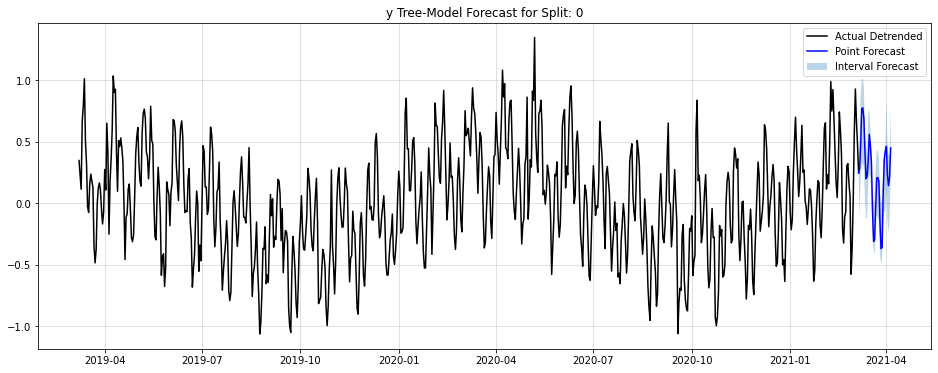

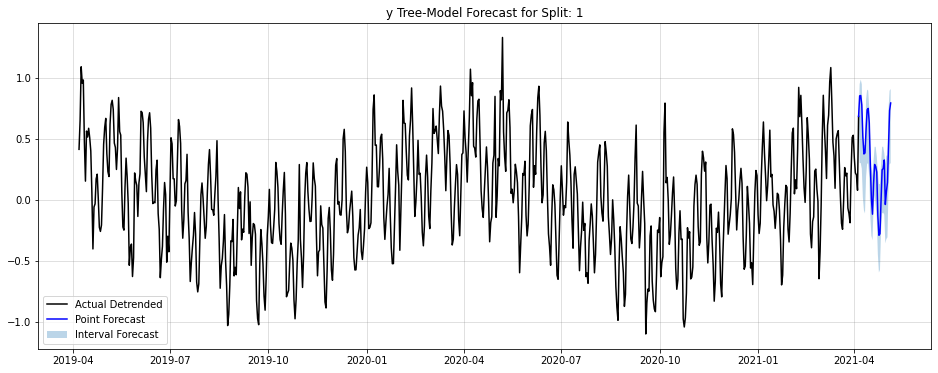

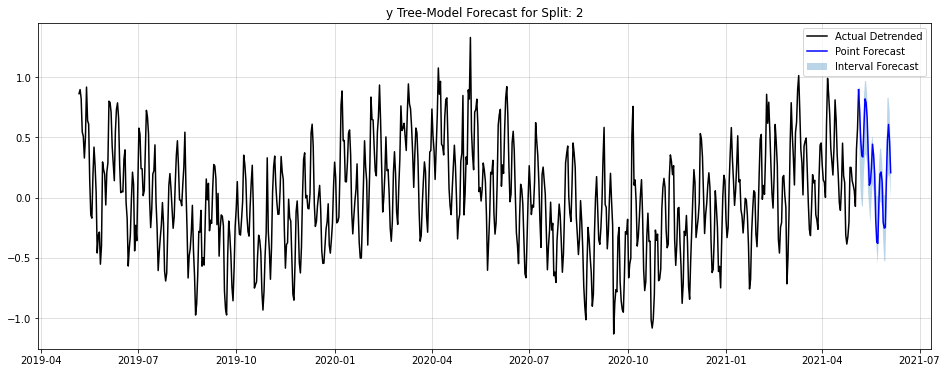

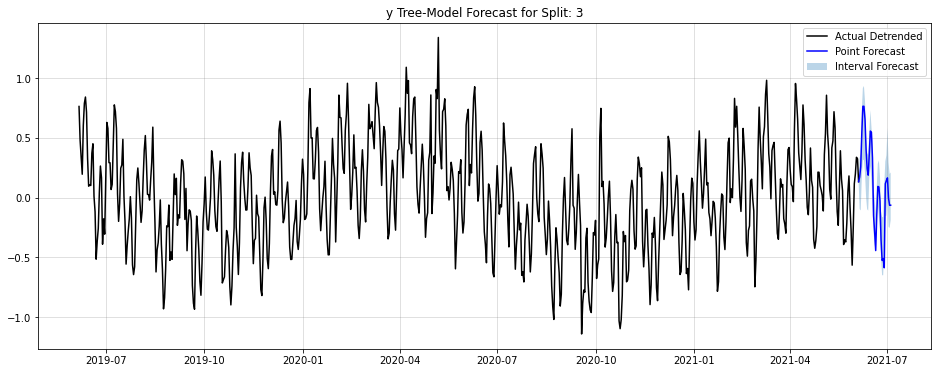

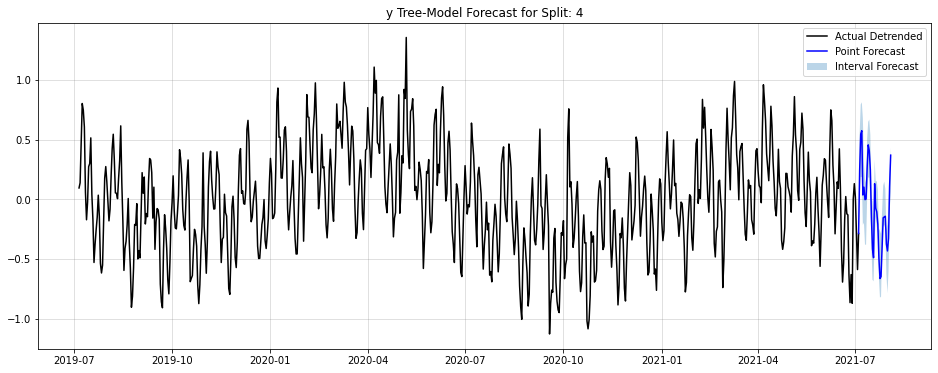

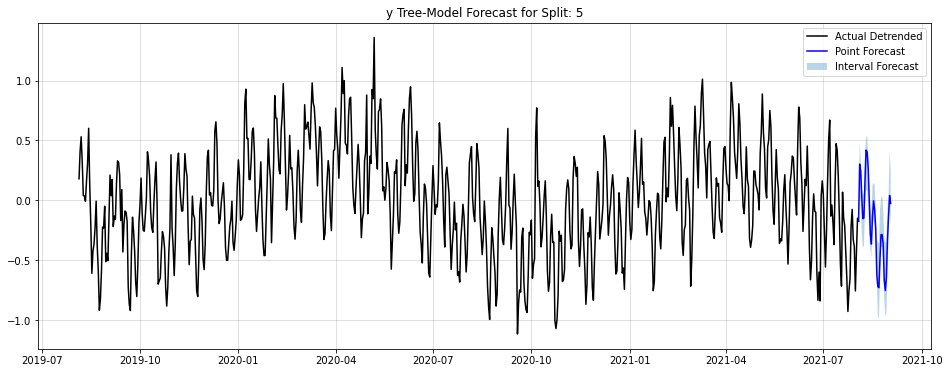

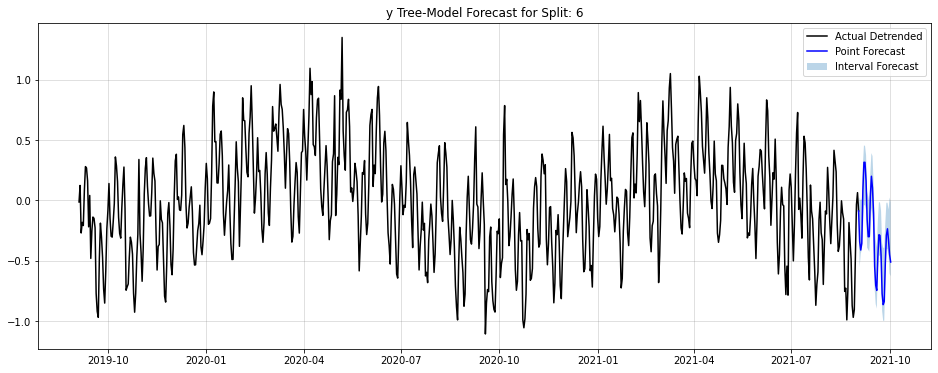

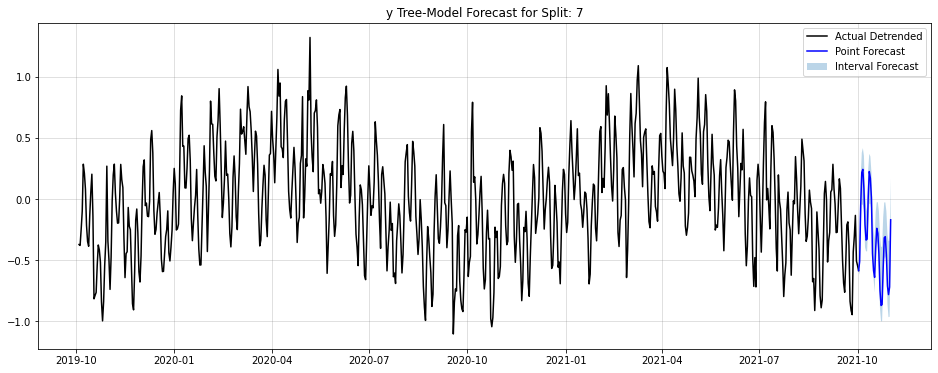

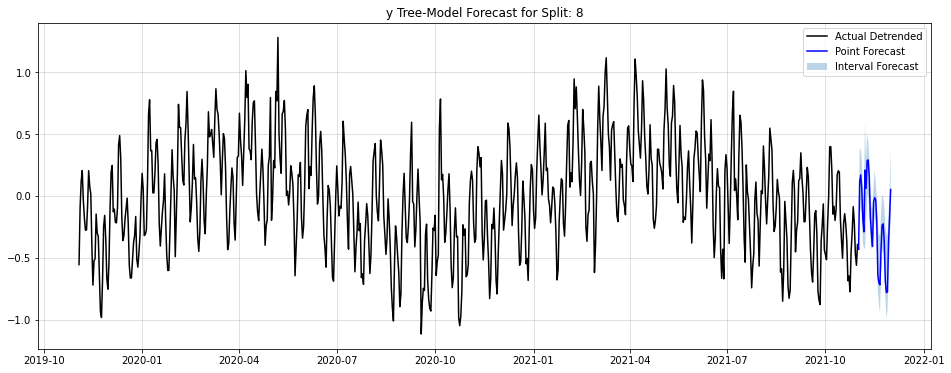

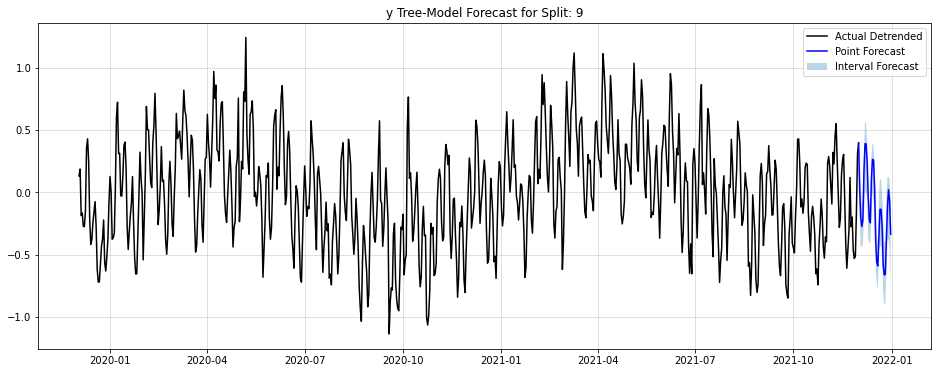

In [146]:
for split in np.arange(0, n_splits):
    train_index, test_index = all_splits[split]
    x_train = np.ravel(df.loc[train_index, ["dt"]])
    y_train = np.ravel(detrend_results.query("split==@split")["detrend"])
    y_point = np.concatenate(([y_train[-1]], tree_pred.query("split==@split")["point"]))
    y_lower = np.concatenate(([y_train[-1]], tree_pred.query("split==@split")["lower"]))
    y_upper = np.concatenate(([y_train[-1]], tree_pred.query("split==@split")["upper"]))
    x_test = np.concatenate(([x_train[-1]], np.ravel(df.loc[test_index, ["dt"]])))
    fig, ax = plt.subplots(ncols = 1, figsize = (16,6))
    plt.plot(x_train, y_train, label = "Actual Detrended", c = "black")
    plt.plot(x_test, y_point, label = "Point Forecast", c = "blue")
    plt.fill_between(x_test, y_lower, y_upper, alpha = 0.3, label = "Interval Forecast")
    plt.grid(visible = True, color = "grey", alpha = 0.3)
    plt.legend()
    plt.title("y Tree-Model Forecast for Split: " + split.astype("str"))
    plt.show() ;

## Combine Forecasts

Combine the trend forecast and the tree-model forecast for each split.

In [147]:
forecast_results = pd.merge(
    left = trend_results.query("type=='forecast'"),
    right = tree_pred,
    how = "inner",
    on = ["split","dt"]
)
forecast_results["trend_point"] = forecast_results["trend"] + forecast_results["point"]
forecast_results["trend_lower"] = forecast_results["trend"] + forecast_results["lower"]
forecast_results["trend_upper"] = forecast_results["trend"] + forecast_results["upper"]
forecast_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   split        300 non-null    int32         
 1   dt           300 non-null    datetime64[ns]
 2   trend        300 non-null    float64       
 3   type         300 non-null    object        
 4   point        300 non-null    float64       
 5   lower        300 non-null    float64       
 6   upper        300 non-null    float64       
 7   trend_point  300 non-null    float64       
 8   trend_lower  300 non-null    float64       
 9   trend_upper  300 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int32(1), object(1)
memory usage: 24.6+ KB


Plot the forecasts

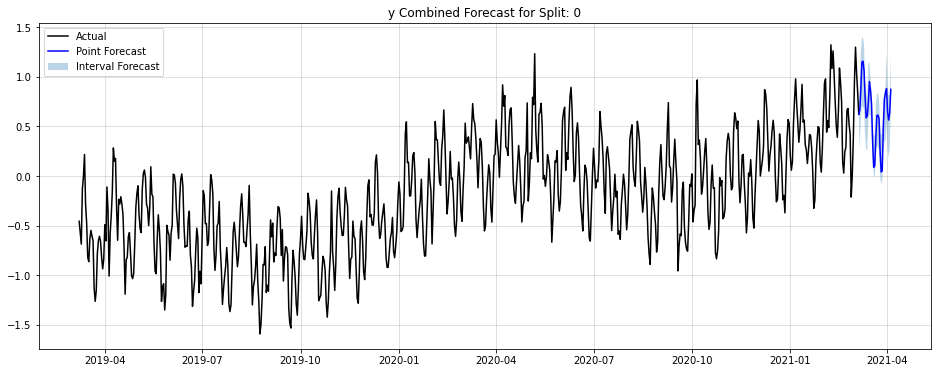

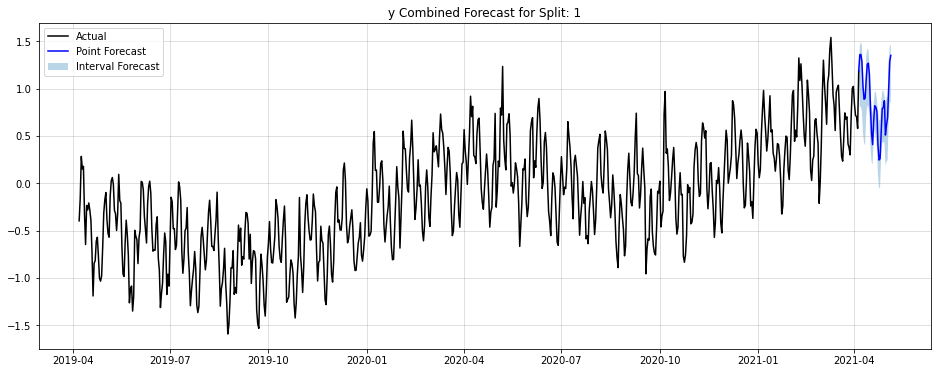

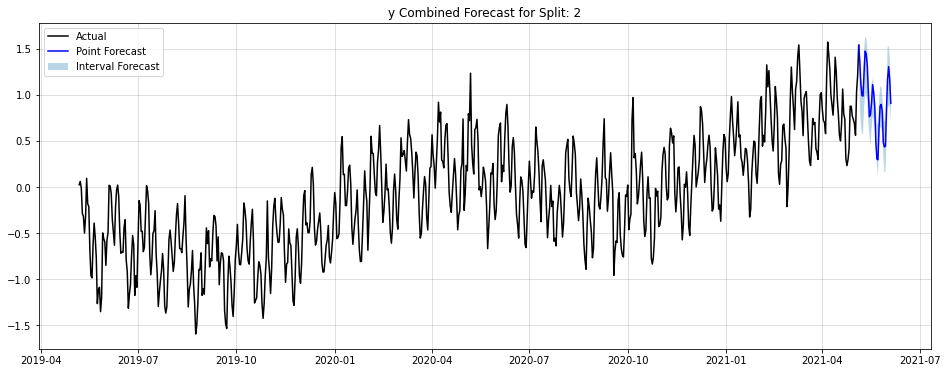

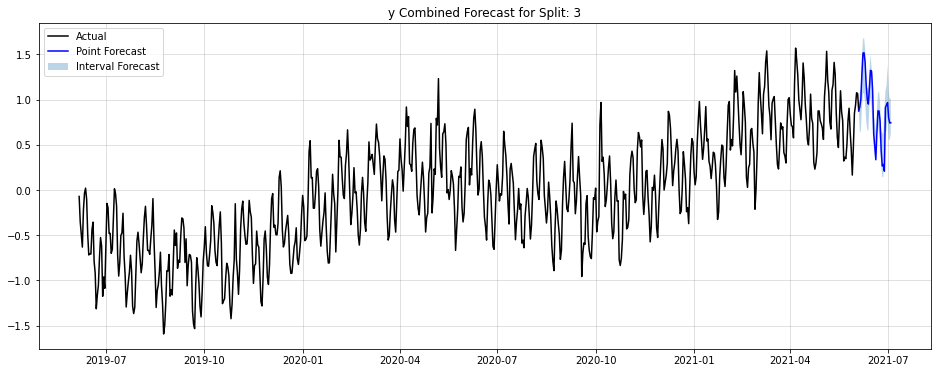

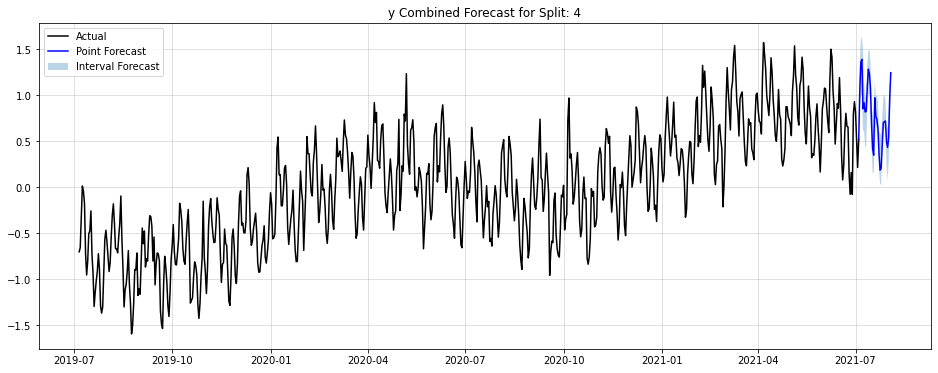

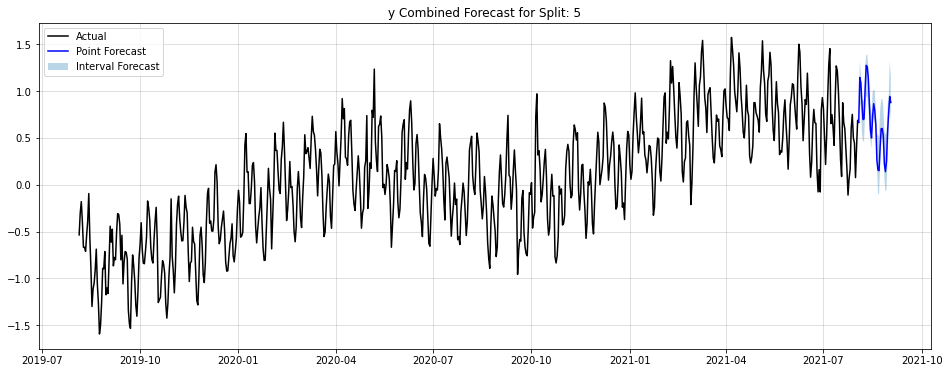

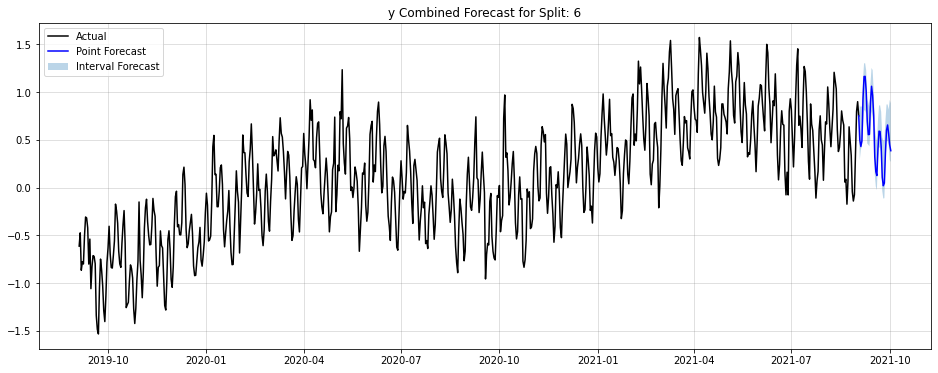

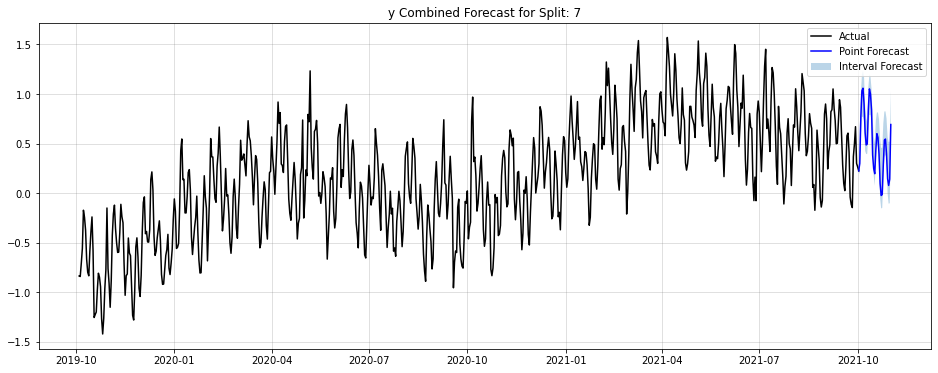

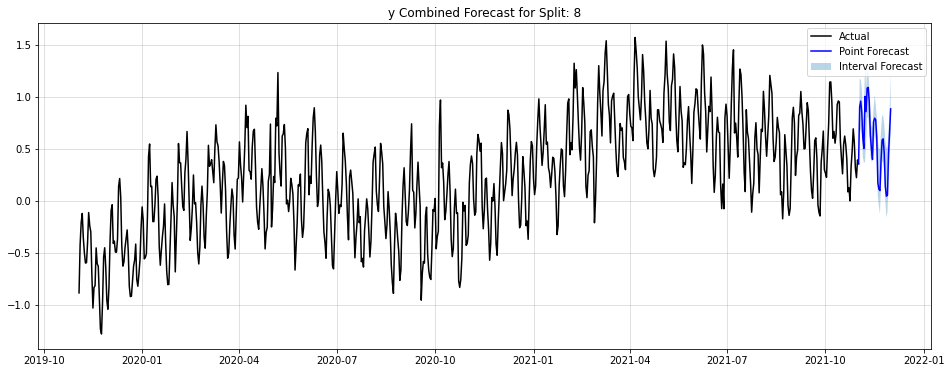

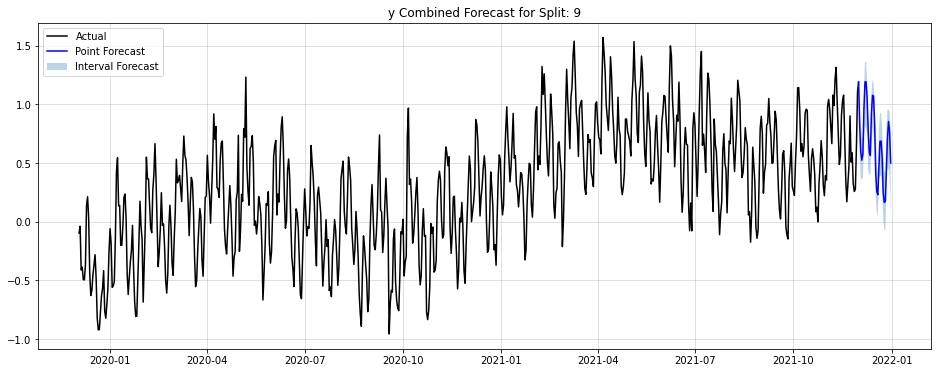

In [148]:
for split in np.arange(0, n_splits):
    train_index, test_index = all_splits[split]
    x_train = np.ravel(df.loc[train_index, ["dt"]])
    y_train = np.ravel(df.loc[train_index, ["y"]])
    y_point = np.concatenate(([y_train[-1]], forecast_results.query("split==@split")["trend_point"]))
    y_lower = np.concatenate(([y_train[-1]], forecast_results.query("split==@split")["trend_lower"]))
    y_upper = np.concatenate(([y_train[-1]], forecast_results.query("split==@split")["trend_upper"]))
    x_test = np.concatenate(([x_train[-1]], np.ravel(df.loc[test_index, ["dt"]])))
    fig, ax = plt.subplots(ncols = 1, figsize = (16,6))
    plt.plot(x_train, y_train, label = "Actual", c = "black")
    plt.plot(x_test, y_point, label = "Point Forecast", c = "blue")
    plt.fill_between(x_test, y_lower, y_upper, alpha = 0.3, label = "Interval Forecast")
    plt.grid(visible = True, color = "grey", alpha = 0.3)
    plt.title("y Combined Forecast for Split: " + split.astype("str"))
    plt.legend()
    plt.show() ;

## Tree-Model Feature Importance

Look at the feature importance of the tree-based model.

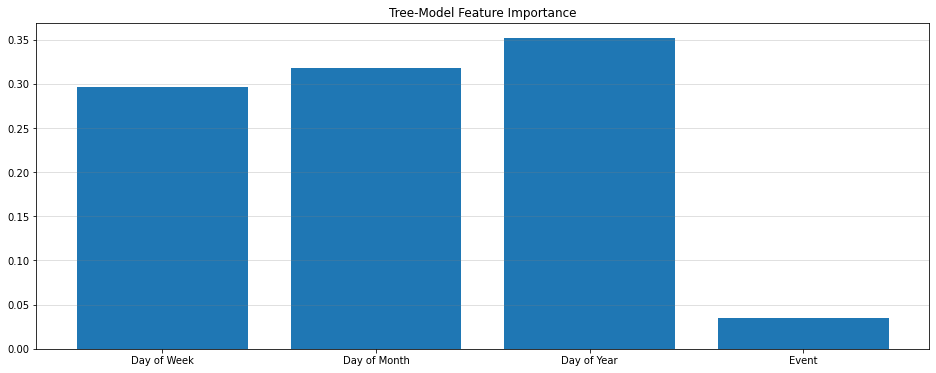

In [149]:
feat_import = pd.DataFrame(
    data = tree_fit_point.feature_importances_,
    columns = ["importance"],
    index = ["Day of Week", "Day of Month", "Day of Year", "Event"]
)
fig, ax = plt.subplots(ncols = 1, figsize = (16,6))
plt.bar(feat_import.index, feat_import["importance"])
plt.grid(visible = True, axis = "y", color = "grey", alpha = 0.3)
plt.title("Tree-Model Feature Importance")
plt.show() ;

## ARIMA Model

For benchmarking, fit an ARIMA model using auto_arima() from pmdarima.

ARIMA = Auto-Regressive (AR) Integrated (I) Moving-Average (MA)

In [161]:
import pmdarima as pm
arima_results = pd.DataFrame()
for split in np.arange(0, len(all_splits)):
    train_index, test_index = all_splits[split]
    x_test = df.loc[test_index, ["event"]]
    x_train = df.loc[train_index, ["event"]]
    y_train = np.ravel(df.loc[train_index, ["y"]])
    arima_model = pm.auto_arima(y = y_train, X = x_train, m = 7)
    arima_pred = arima_model.predict(n_periods = len(x_test.index), X = x_test)
    arima_fore = pd.DataFrame({
        "split": split,
        "dt": np.ravel(df.loc[test_index, ["dt"]]),
        "arima_pred": arima_pred
    })
    arima_results = pd.concat([arima_results, arima_fore], axis = 0)
arima_results.info()

C:\Users\bwe0250\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\bwe0250\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\bwe0250\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\bwe0250\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   split       300 non-null    int32         
 1   dt          300 non-null    datetime64[ns]
 2   arima_pred  300 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 8.2 KB


C:\Users\bwe0250\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


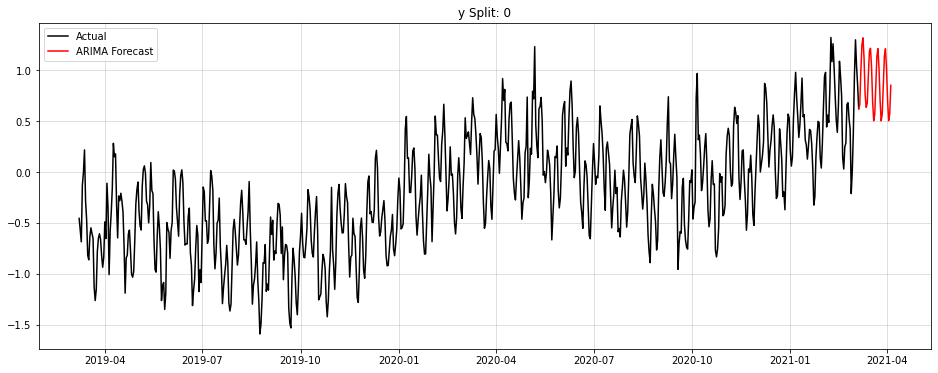

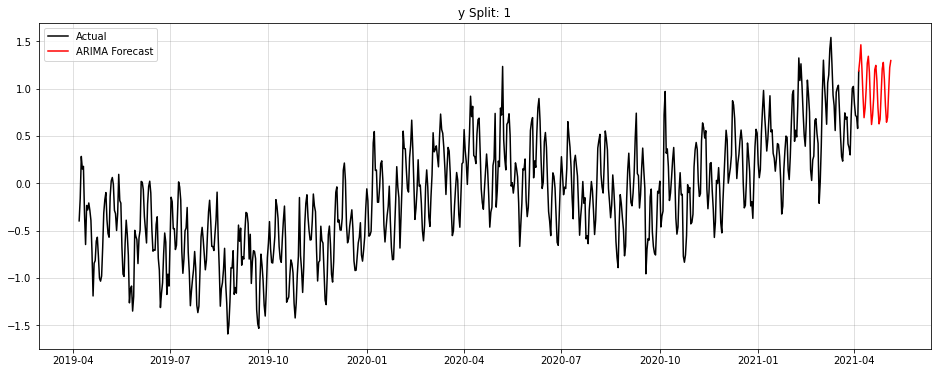

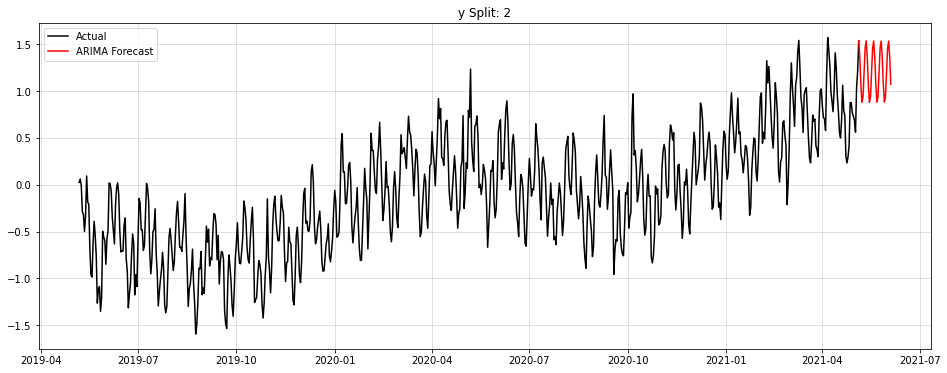

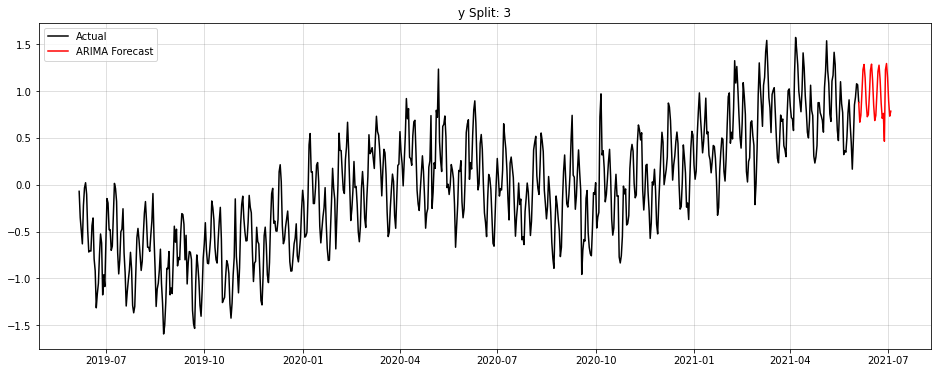

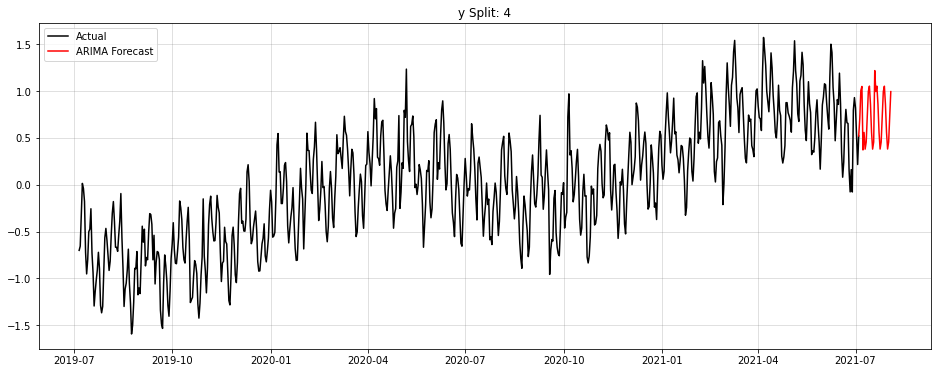

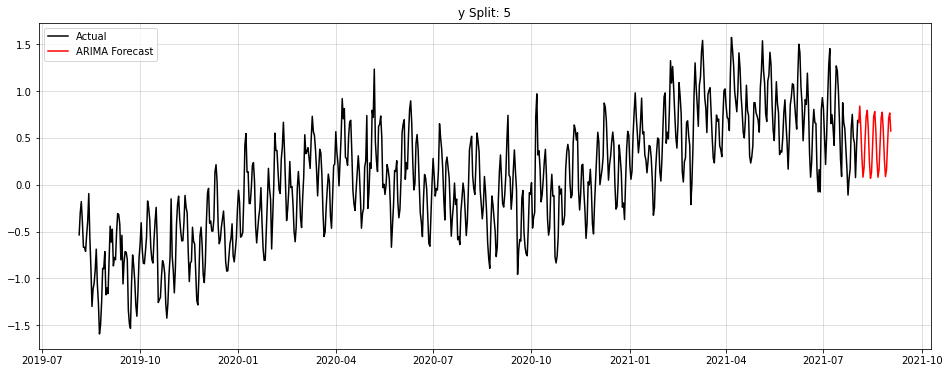

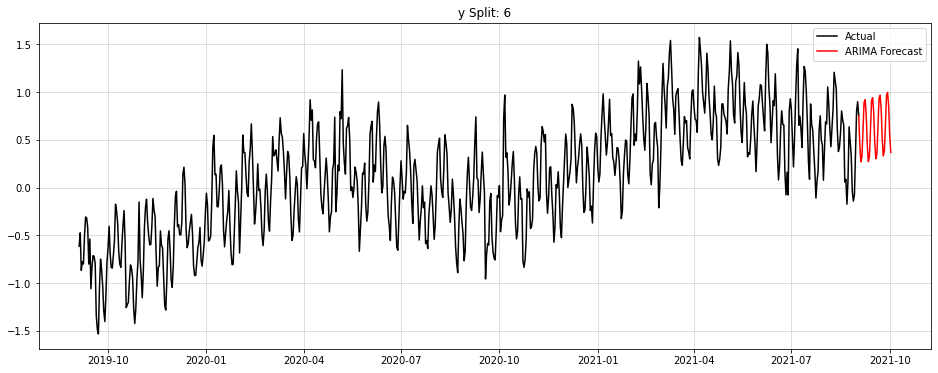

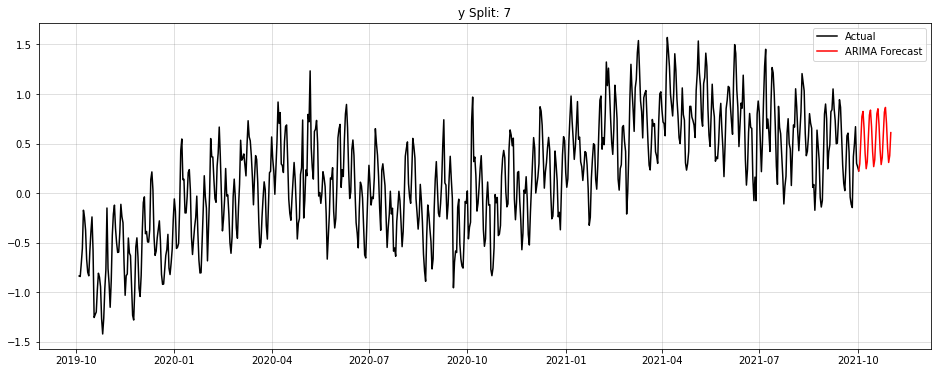

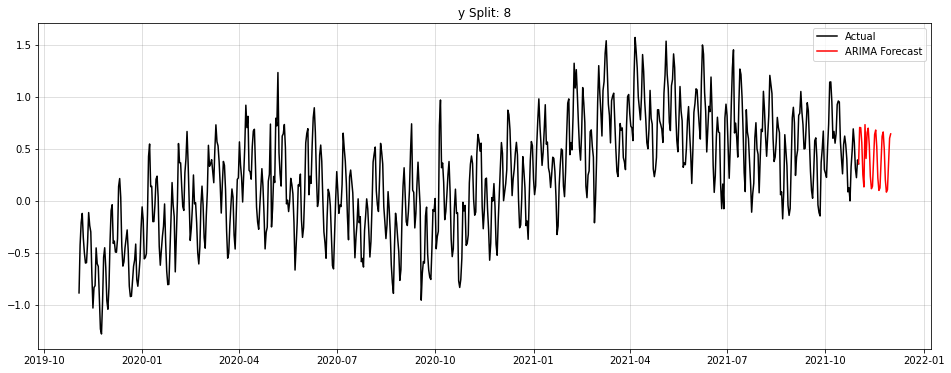

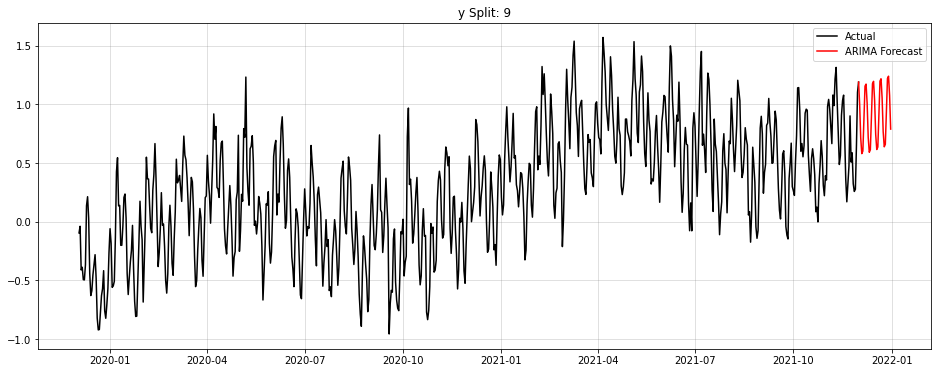

In [162]:
for split in np.arange(0, n_splits):
    train_index, test_index = all_splits[split]
    x_train = np.ravel(df.loc[train_index, ["dt"]])
    x_test = np.concatenate(([x_train[-1]], np.ravel(df.loc[test_index, ["dt"]])))
    y_train = np.ravel(df.loc[train_index, ["y"]])
    y_pred = np.concatenate(([y_train[-1]], arima_results.query("split==@split")["arima_pred"]))
    fig, ax = plt.subplots(ncols = 1, figsize = (16,6))
    plt.plot(x_train, y_train, label = "Actual", c = "black")
    plt.plot(x_test, y_pred, label = "ARIMA Forecast", c = "red")
    plt.grid(visible = True, color = "grey", alpha = 0.3)
    plt.title("y Split: " + split.astype("str"))
    plt.legend()
    plt.show() ;

## Compare Forecast Error 

Use Lev's custom error function to calculate the forecast error.

See this [repo](https://github.com/lselector/statistics/blob/master/nb_Time_Series_Forecast_Error.ipynb) for more details.

In [163]:
%run fin_err.py
y_actual = df.tail(test_size*n_splits)["y"]
# Tree-Model
tree_error = fin_err(
    actual = y_actual,
    predicted = forecast_results["trend_point"],
    err_type = 'rmse'
)
# ARIMA
arima_error = fin_err(
    actual = y_actual,
    predicted = arima_results["arima_pred"],
    err_type = "rmse"
)
# Print Error Metrics
print(f": Tree-Model = {np.round(100*tree_error, 2)}" + "%")
print(f":      ARIMA = {np.round(100*arima_error, 2)}" + "%")

: Tree-Model = 10.93%
:      ARIMA = 18.26%


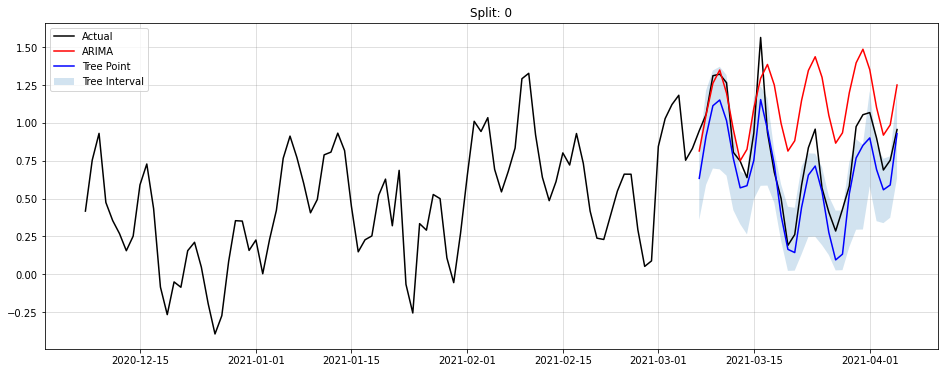

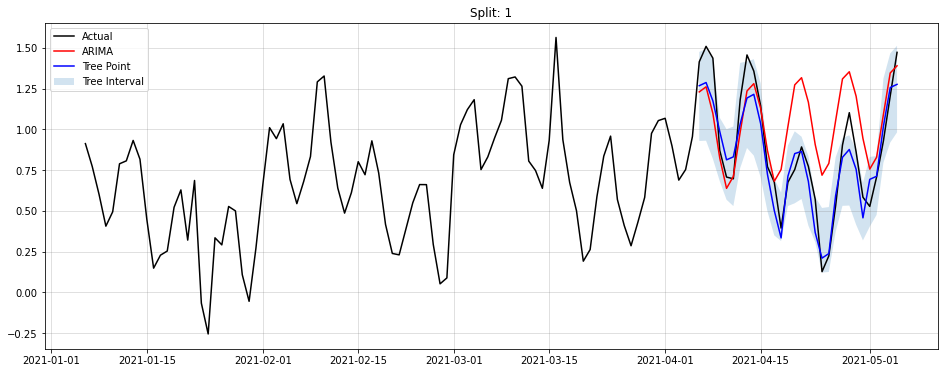

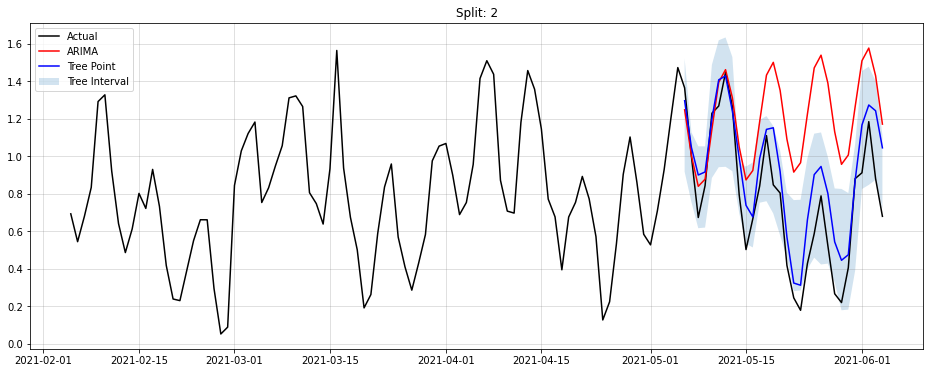

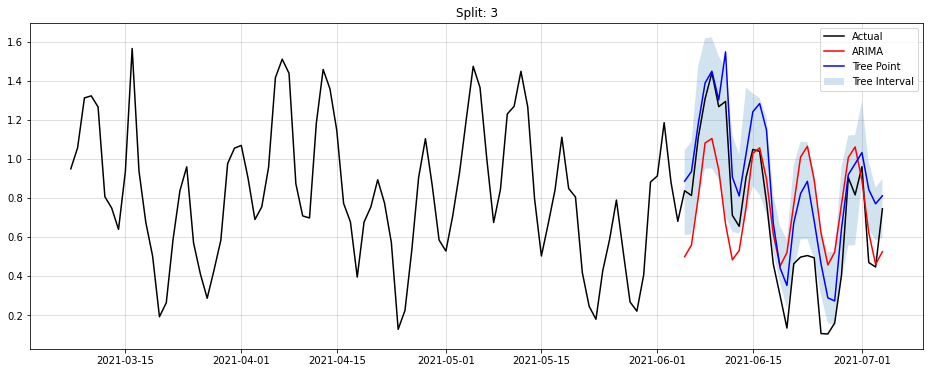

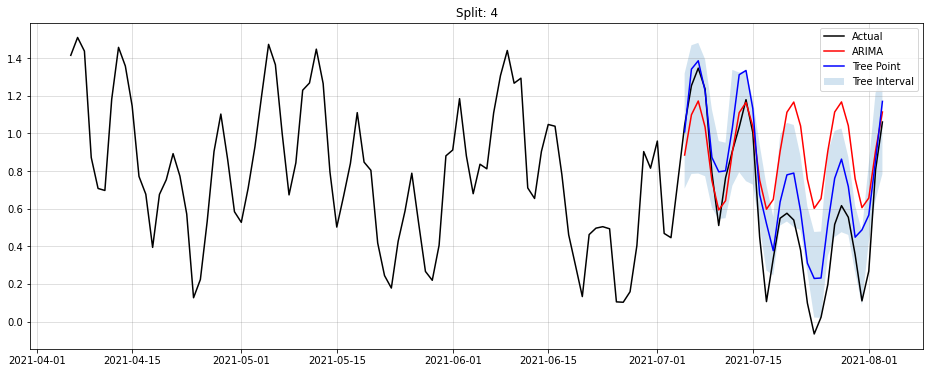

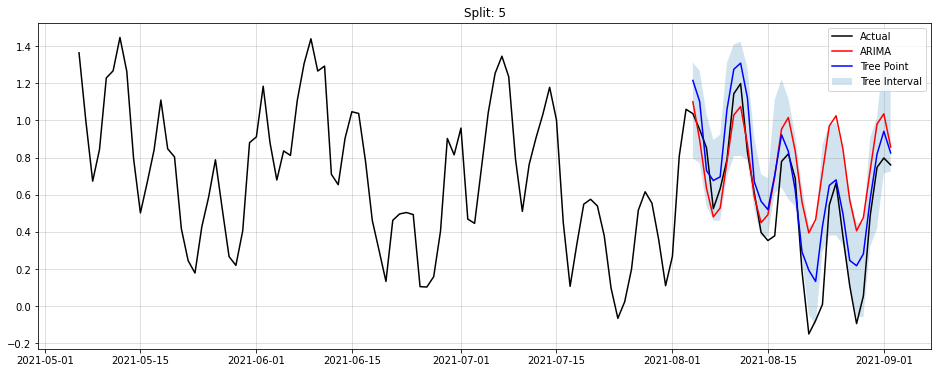

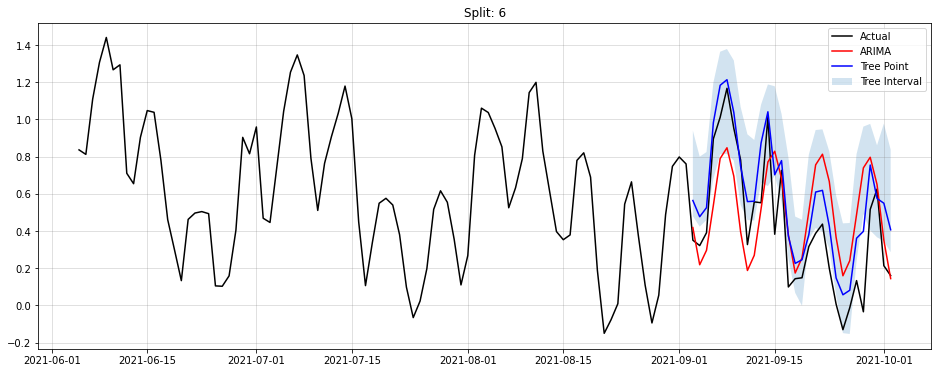

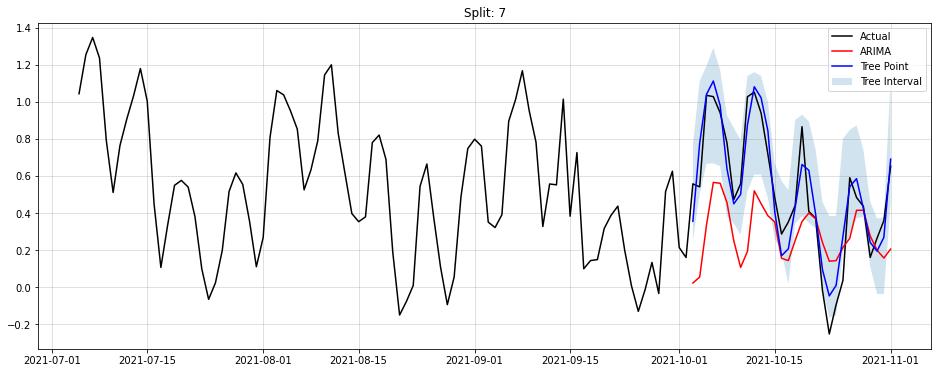

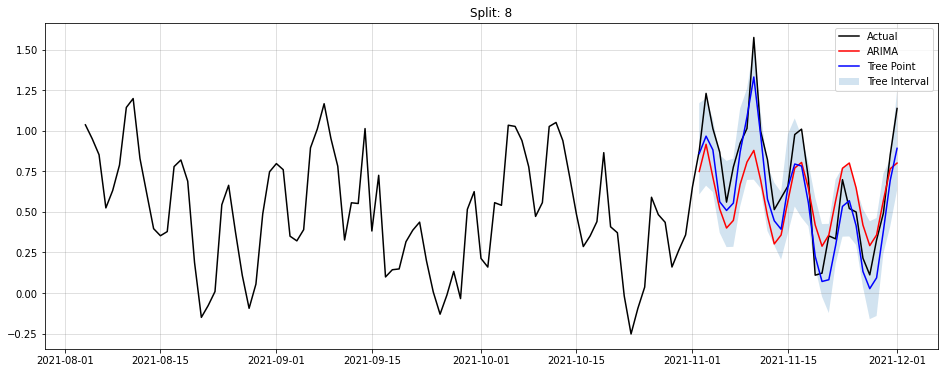

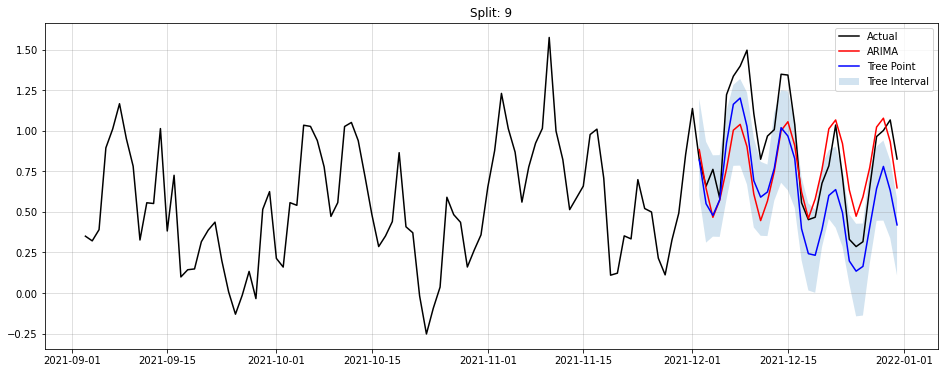

In [49]:
for split in np.arange(0, n_splits):
    train_index, test_index = all_splits[split]
    x_train = np.ravel(df.loc[train_index, ["dt"]].tail(test_size*3))
    x_test = np.ravel(df.loc[test_index, ["dt"]])
    y_train = np.ravel(df.loc[train_index, ["y"]].tail(test_size*3))
    y_test = np.ravel(df.loc[test_index, ["y"]])
    y_pred_arima = np.ravel(arima_results.query("split==@split")["arima_pred"])
    y_pred_point = np.ravel(forecast_results.query("split==@split")["trend_point"])
    y_pred_lower = np.ravel(forecast_results.query("split==@split")["trend_lower"])
    y_pred_upper = np.ravel(forecast_results.query("split==@split")["trend_upper"])
    fig, ax = plt.subplots(ncols = 1, figsize = (16,6))
    plt.plot(np.append(x_train, x_test), np.append(y_train, y_test), label = "Actual", c = "black")
    plt.plot(x_test, y_pred_arima, label = "ARIMA", c = "red")
    plt.plot(x_test, y_pred_point, label = "Tree Point", c = "blue")
    plt.fill_between(x_test, y_pred_lower, y_pred_upper, alpha = 0.2, label = "Tree Interval")
    plt.grid(visible = True, color = "grey", alpha = 0.3)
    plt.title("Split: " + split.astype("str"))
    plt.legend()
    plt.show() ;